# Sales data Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")



# Data Audit

In [3]:
## first five row of the dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
## Last five row of dataset
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [5]:
# shape of the dataset
df.shape

(128975, 24)

In [6]:
# columns in the dataset
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
# display the size of the dataset
df.size

3095400

In [8]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
# The data shows that the bool(1), float64(2), int64(2), object(19) columns are available in the given dataset

## descriptive statistics data

In [10]:
# Statistical description of dataset
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# EDA Processing

# checking missing values

In [11]:
df.isnull().sum()/len(df)*100

index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
dtype: float64

In [12]:
# the data shows that the Unnamed: 22(49050), fulfilled-by (89698),promotion-ids (49153), Courier Status (6872),currency (7795),Amount (7795),ship-city (33),ship-state (33),ship-postal-code (33),ship-country (33) null values are available.

# Handeling Missing Values

In [13]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [14]:
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [15]:
df['Courier Status'].mode()

0    Shipped
dtype: object

In [16]:
df['Courier Status']=df['Courier Status'].fillna(df['Courier Status'].mode()[0])

In [17]:
df.drop(['promotion-ids','fulfilled-by','Unnamed: 22','currency'],1,inplace=True)

In [18]:
df.drop(['index'],1,inplace=True)

In [19]:
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

In [20]:
df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0])

In [21]:
df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0])

In [22]:
df['ship-postal-code']=df['ship-postal-code'].fillna(df['ship-postal-code'].mean())

In [23]:
df.drop(['ship-country'],1,inplace=True)

In [24]:
df.isnull().sum()/len(df)*100

Order ID              0.0
Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Style                 0.0
SKU                   0.0
Category              0.0
Size                  0.0
ASIN                  0.0
Courier Status        0.0
Qty                   0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
B2B                   0.0
dtype: float64

# To check the distribution of the data

In [25]:
df['B2B'].unique()

array([False,  True])

<AxesSubplot:xlabel='B2B', ylabel='count'>

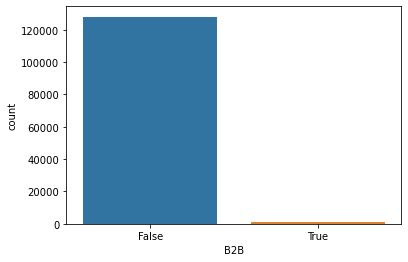

In [26]:
sns.countplot(df['B2B'])

In [27]:
# The data shows that B2B False count is greater than True.

In [28]:
#map_dict={0:'False',1:'True'}
#df['B2B']=df['B2B'].map(map_dict)

# Categorical and Numerical columns of the dataset

In [29]:
cat_col=df.select_dtypes(include="O").columns
cat_col

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'ship-city', 'ship-state'],
      dtype='object')

In [30]:
num_col=df.select_dtypes(exclude="O").columns
num_col

Index(['Qty', 'Amount', 'ship-postal-code', 'B2B'], dtype='object')

# Handeling Categrical column

In [31]:
df['Status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [32]:
# The data shows that the count of the Status of the product.

<AxesSubplot:xlabel='Fulfilment', ylabel='count'>

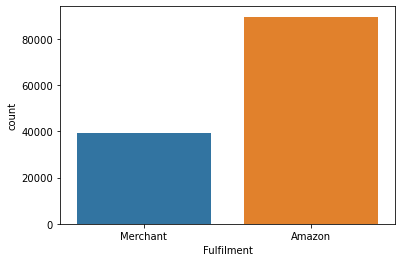

In [33]:
sns.countplot(df['Fulfilment'])

In [34]:
# The data shows that the count of the Fulfilment against Merchant and Amazone.

<AxesSubplot:xlabel='Sales Channel ', ylabel='count'>

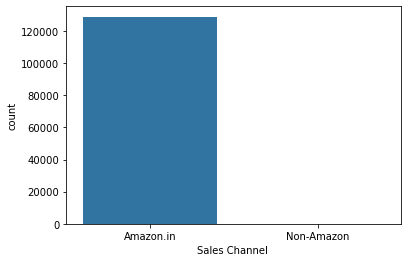

In [35]:
sns.countplot(df['Sales Channel '])

In [36]:
# The data shows that the Amazone channel sales more than non-amazone sales.

<AxesSubplot:xlabel='ship-service-level', ylabel='count'>

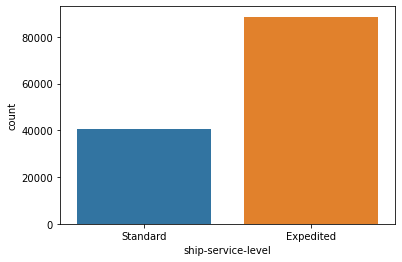

In [37]:
sns.countplot(df['ship-service-level'])

In [38]:
# The data shows that the count of the ship service level.
# Shows that The Expedited service is more than the standard service.

In [39]:
df['Style'].value_counts()

JNE3797    4224
JNE3405    2263
J0230      1868
SET268     1860
J0341      1630
           ... 
BTM004        1
SET036        1
JNE3157       1
JNE3355       1
SET045        1
Name: Style, Length: 1377, dtype: int64

In [40]:
# The data shows that the count of the Styles.

In [41]:
df['Style'].max()

'SET462'

In [42]:
# maximum saled style is SET462.

In [43]:
df['Style'].min()

'AN201'

In [44]:
# minimum saled style is AN201.

In [45]:
df['SKU'].value_counts()

JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: SKU, Length: 7195, dtype: int64

In [46]:
# The data show that the SKU slots count.

<AxesSubplot:xlabel='Category', ylabel='count'>

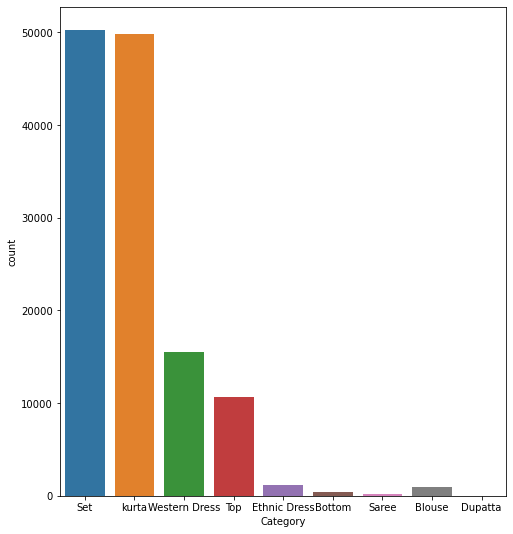

In [47]:
plt.figure(figsize=(8,9))
sns.countplot(df['Category'])

<AxesSubplot:xlabel='Size', ylabel='count'>

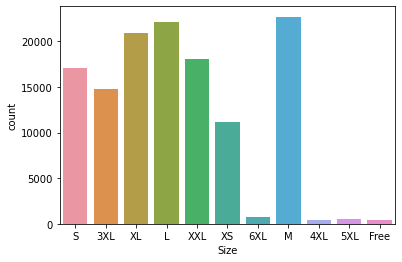

In [48]:
sns.countplot(df['Size'])

In [49]:
# Data shows that the medium,Large and extra large size saled more from customers.

In [50]:
df['ASIN'].value_counts()

B09SDXFFQ1    773
B09SDY8DCT    657
B09SDYQ3WG    587
B081WSCKPQ    535
B08XNJG8B1    507
             ... 
B08QGLTM6G      1
B08W8DBLXF      1
B09TL1F68S      1
B07MY3MVW3      1
B07N81TFNY      1
Name: ASIN, Length: 7190, dtype: int64

In [51]:
# Data shows that the value counts of the ASIN.

<AxesSubplot:xlabel='Courier Status', ylabel='count'>

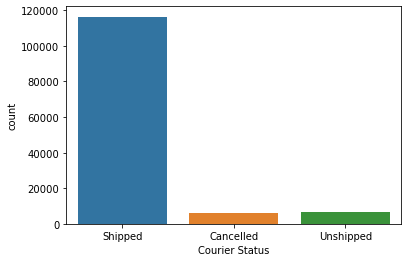

In [52]:
sns.countplot(df['Courier Status'])

In [53]:
# Data shows that the count of product shipped is more that the cancelled or unshiped.

In [54]:
df['ship-city'].value_counts()

BENGALURU                                      11250
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: ship-city, Length: 8955, dtype: int64

In [55]:
# Data shows that the Bengaluru city buyed more product from Amazone.

In [56]:
df['ship-state'].value_counts()

MAHARASHTRA               22293
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: ship-state, Length: 69, dtype: int64

In [57]:
# Data shows that the Maharashtra state buyed more product from Amazone as compared to other state.

<AxesSubplot:>

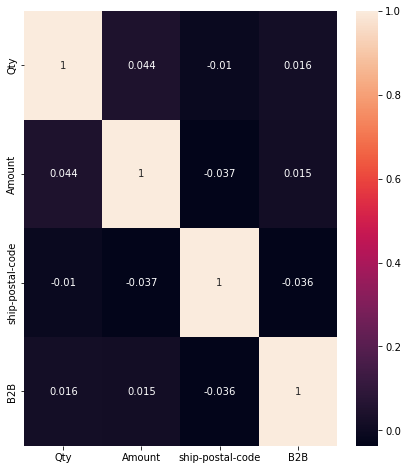

In [58]:
corr=df.corr()
plt.figure(figsize=(7,8))
sns.heatmap(corr,annot=True)

In [59]:
# Describe the correlation of the dataset

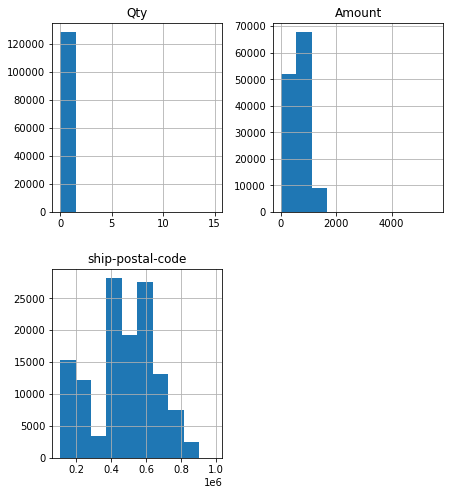

In [60]:
p=df.hist(figsize=(7,8))

In [61]:
# The data shows that the distribution of numerical columns.

In [62]:
df['Amount'].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

<AxesSubplot:xlabel='Fulfilment', ylabel='count'>

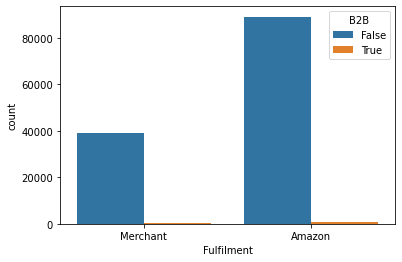

In [63]:
sns.countplot(df['Fulfilment'],hue=df['B2B'])

In [64]:
# The data shows that the count of the B2B and Fulfilment.
# data shows that Amazone mostly not preffered for B2B.

# Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [66]:
#map_dict={0:"False",1:"True"}
#df['B2B']=df['B2B'].map(map_dict)
df['B2B']=le.fit_transform(df['B2B'])

In [67]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,70508,30,0,1,0,1,1342,6992,5,7,5563,1,0,647.62,4795,28,400081.0,0
1,13615,30,5,1,0,1,847,4436,8,0,5277,1,1,406.00,776,23,560085.0,0
2,45301,30,3,0,0,0,533,2633,8,8,675,1,1,329.00,5353,28,410210.0,1
3,43682,30,0,1,0,1,373,1767,7,5,4638,1,0,753.33,6140,43,605008.0,0
4,90099,30,3,0,0,0,754,3837,6,0,4351,1,1,574.00,1466,56,600073.0,0


In [68]:
df['B2B'].value_counts()

0    128104
1       871
Name: B2B, dtype: int64

# Spliting data into train_test_split

In [69]:
x=df.drop('B2B',1)


In [70]:
y=df['B2B']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=145)

In [73]:
x_train.shape

(103180, 17)

In [74]:
x_test.shape

(25795, 17)

In [75]:
y_train.shape

(103180,)

In [76]:
y_test.shape

(25795,)

# Scalling 

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
print("Train Data")
print(accuracy_score(y_train,y_pred_train))
print("Test Data")
print(accuracy_score(y_test,y_pred_test))

Train Data
0.9933514246947083
Test Data
0.9928280674549331


In [84]:
# The model predicted with 99% accuracy.

In [85]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print(classification_report(y_train,y_pred_train))
    print(classification_report(y_test,y_pred_test))
    

# KNN and Decision Tree 

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [88]:
my_model(lr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    102494
           1       0.00      0.00      0.00       686

    accuracy                           0.99    103180
   macro avg       0.50      0.50      0.50    103180
weighted avg       0.99      0.99      0.99    103180

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25610
           1       0.50      0.01      0.01       185

    accuracy                           0.99     25795
   macro avg       0.75      0.50      0.50     25795
weighted avg       0.99      0.99      0.99     25795



In [89]:
# The model predicted with 99% accuracy.

In [90]:
my_model(knn)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    102494
           1       0.68      0.02      0.05       686

    accuracy                           0.99    103180
   macro avg       0.84      0.51      0.52    103180
weighted avg       0.99      0.99      0.99    103180

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25610
           1       0.50      0.01      0.02       185

    accuracy                           0.99     25795
   macro avg       0.75      0.51      0.51     25795
weighted avg       0.99      0.99      0.99     25795



In [91]:
# The model predicted with 99% accuracy.

In [92]:
my_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102494
           1       1.00      1.00      1.00       686

    accuracy                           1.00    103180
   macro avg       1.00      1.00      1.00    103180
weighted avg       1.00      1.00      1.00    103180

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25610
           1       0.04      0.05      0.04       185

    accuracy                           0.98     25795
   macro avg       0.52      0.52      0.52     25795
weighted avg       0.99      0.98      0.99     25795



In [93]:
# The model predicted with overfit.

# Pruning

In [94]:
dt1=DecisionTreeClassifier(max_depth=5)
my_model(dt1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    102494
           1       1.00      0.01      0.03       686

    accuracy                           0.99    103180
   macro avg       1.00      0.51      0.51    103180
weighted avg       0.99      0.99      0.99    103180

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25610
           1       0.00      0.00      0.00       185

    accuracy                           0.99     25795
   macro avg       0.50      0.50      0.50     25795
weighted avg       0.99      0.99      0.99     25795



In [95]:
# The model predicted with 99% accuracy.

# Decisin Tree

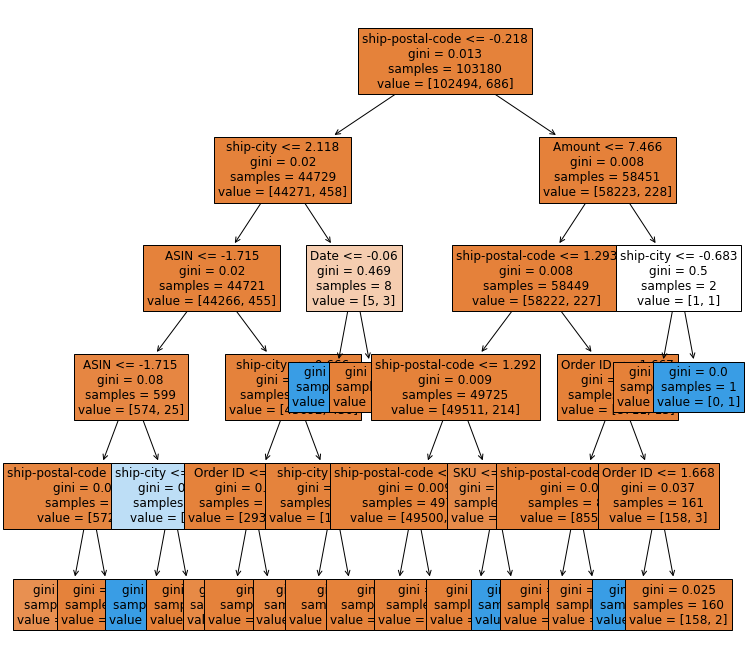

In [96]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(12,12))
chart=tree.plot_tree(dt1,max_depth=5,feature_names=x.columns,filled=True,fontsize=12)

In [97]:
y_train_proba=lr.predict_proba(x_train)[:,1]
y_train_proba

array([0.00882505, 0.00813185, 0.00503634, ..., 0.00991206, 0.00509406,
       0.00678374])

# ROC-AUC Curve

Text(0.5, 1.0, 'ROC curve for Sales Data')

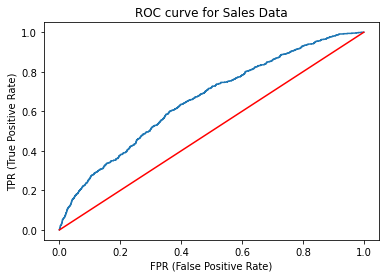

In [98]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_train,y_train_proba)
#sns.lineplot(x=fpr,y=tpr)
plt.plot(fpr,tpr)
sns.lineplot(x=[0.0,1.0],y=[0.0,1.0],color="red")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("ROC curve for Sales Data")

# Adaboost and Random Forest Classifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
adb=AdaBoostClassifier()
rf=RandomForestClassifier()

# Adaboost 

In [101]:
adb.fit(x_train,y_train)
y_train_pred=adb.predict(x_train)
y_test_pred=adb.predict(x_test)

In [102]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
0.9933514246947083
Test Data
0.9928280674549331


In [103]:
# The model predicted with 99% accuracy.

# Random Forest

In [104]:
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [105]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
0.9999806163985269
Test Data
0.9928280674549331


In [106]:
# The model predicted with overfited.

In [107]:
rf1=RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=12,min_samples_split=10,random_state=156)
rf1

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=10,
                       n_estimators=200, random_state=156)

In [108]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=10,
                       n_estimators=200, random_state=156)

In [109]:
y_pred_train=rf1.predict(x_train)
y_pred_test=rf1.predict(x_test)

In [110]:
print("Train Data")
print(accuracy_score(y_train,y_pred_train))
print("Test Data")
print(accuracy_score(y_test,y_pred_test))

Train Data
0.9935064935064936
Test Data
0.9928280674549331


In [111]:
# The model predicted with 99% accuracy.


# Support Vector Machine

In [112]:
from sklearn.svm import SVC

In [113]:
svm=SVC(kernel='linear')
my_model(svm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    102494
           1       0.00      0.00      0.00       686

    accuracy                           0.99    103180
   macro avg       0.50      0.50      0.50    103180
weighted avg       0.99      0.99      0.99    103180

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25610
           1       0.00      0.00      0.00       185

    accuracy                           0.99     25795
   macro avg       0.50      0.50      0.50     25795
weighted avg       0.99      0.99      0.99     25795



In [114]:
The SVM model predicted with 99% accuracy.